In [1]:
#数据标准化是对图片进行处理，让所有图片保证统一规格
#图片统一规格之后，模型更容易学习到相同图片之间的相似性
#有标准化（使数据减去其平均值使其中心为0,再除以方差）和归一化

In [2]:
#可以使用批标准化，是将分散的数据统一的一种做法
#批标准化不仅在数据输入模型之前对数据做标准化
#在网络的每一次变换之后都要考虑数据标准化（经过一层后各种分布发生改变，所以每次都要处理）
#批标准化可以解决梯度消失与梯度爆炸等问题，也是一种训练优化方法
#例如sigmoid函数我们希望数据分散到0的周围
#使用批标准化可以加速收敛，提高模型的泛化能力
#批标准化允许使用更深的网络，但只有包含多个BatchNormalization层才能进行训练
#广泛应用于keras的各项卷积神经网络
import tensorflow as tf
from tensorflow import keras
# batchNormalization层通常用于在卷积层或密集连接层之后使用
# keras.layers.BatchNormalization()

In [3]:
#求每一个训练批次数据的均值与方差，然后求整个训练样本的均值和方差期望值
#批标准化的参数,training=True，代表训练模式，false为推理模式或者预测模式
#放在激活层之后效果会更好，先全连接层

In [4]:
#读取鸟类并区分类别的数据，受制于数据集很小(每个最多七十种)多种类，该难度十分大
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
all_image_path=glob.glob('birds\\birds/*/*.jpg')
all_image_path[-5:]

['birds\\birds\\200.Common_Yellowthroat\\Common_Yellowthroat_0118_190805.jpg',
 'birds\\birds\\200.Common_Yellowthroat\\Common_Yellowthroat_0121_190597.jpg',
 'birds\\birds\\200.Common_Yellowthroat\\Common_Yellowthroat_0122_190570.jpg',
 'birds\\birds\\200.Common_Yellowthroat\\Common_Yellowthroat_0125_190902.jpg',
 'birds\\birds\\200.Common_Yellowthroat\\Common_Yellowthroat_0126_190407.jpg']

In [6]:
img_path=all_image_path[1000]
img_path

'birds\\birds\\019.Gray_Catbird\\Gray_Catbird_0007_20186.jpg'

In [7]:
#提取图片类别名称
label=img_path.split('\\')[2].split('.')[1]
label

'Gray_Catbird'

In [8]:
all_label_name=[img_path.split('\\')[2].split('.')[1] for img_path in all_image_path]
all_label_name[:10]
#这样我们就获得了所有的标签

['Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross',
 'Black_footed_Albatross']

In [9]:
label_names=np.unique(all_label_name)#返回唯一值，这样我们可以得知类别有多少个

In [10]:
#enumerate方法可以每次枚举的时候返回一个序号和名称，所以我们可以用这样的迭代方法
#来完成我们的测试
label_to_index=dict((name,i) for i,name in enumerate(label_names))


In [11]:
#翻转列表成我们想要的
index_to_label=dict((i,name) for name,i in label_to_index.items())


In [12]:
#我们利用label_to_index
all_labels=[label_to_index.get(name) for name in all_label_name]

In [13]:
import random
random_index=np.random.permutation(len(all_image_path))
random_index

array([ 3026, 11715, 11759, ..., 10769,  1895, 11143])

In [14]:
all_img_path=np.array(all_image_path)[random_index]
all_labels=np.array(all_labels)[random_index]
#这样的话，我们就实现了图片与标签的共同乱序

In [15]:
i=int(len(img_path)*0.8)
train_path=all_image_path[:i]
train_labels=all_labels[:i]
test_path=all_image_path[i:]
test_labels=all_labels[i:]

In [16]:
import tensorflow as tf
train_data=tf.data.Dataset.from_tensor_slices((train_path,train_labels))
test_data=tf.data.Dataset.from_tensor_slices((test_path,test_labels))

In [17]:
def load_img(path,label):
    img=tf.io.read_file(path)
    img=tf.image.decode_jpeg(img,channels=3)
    img=tf.image.resize(img,[256,256])
    img=tf.cast(img,tf.float32)
    img=img/255.0
    return img,label#加载图片的标签不需要处理直接返回

train_data=train_data.map(load_img)

In [18]:

train_data

<MapDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [19]:
test_data=test_data.map(load_img)
test_data

<MapDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [20]:
BATCH_SIZE=32

In [21]:
train_data=train_data.repeat().shuffle(300).batch(BATCH_SIZE)

In [22]:
train_data#多出来一个batch维度

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [23]:
test_data=test_data.batch(BATCH_SIZE)

In [24]:
from tensorflow import keras
model = tf.keras.Sequential()   
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200))#不激活的输出为logits，输出为200个张量

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 252, 252, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 124, 124, 128)     5

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
               loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=keras.metrics.Accuracy() )
    #from_logits使用看最后一层是否激活

In [27]:
train_count=len(train_path)
test_count=len(test_path)

In [28]:
import tensorflow as tf
from tensorflow import keras
model=keras.models.load_model('weight/birds.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
batch_normalization_24 (Batc (None, 254, 254, 64)      256       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
batch_normalization_25 (Batc (None, 252, 252, 64)      256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
batch_normalization_26 (Batc (None, 124, 124, 128)    

In [29]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32)
    image = image/255.0  # normalize to [0,1] range
    return image

White_eyed_Vireo


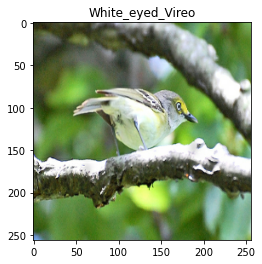

In [32]:
import random 
i=random.choice(range(len(all_image_path)))
img=load_and_preprocess_image(all_image_path[i])
plt.imshow(img.numpy())
img=tf.expand_dims(img,axis=0)
pred=model.predict(img)
res=np.argmax(pred)
plt.title(index_to_label.get(res))
print(all_image_path[i].split('\\')[2].split('.')[1])

In [ ]:
model.evaluate(test_data,steps=test_count//BATCH_SIZE)